In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import csv

In [11]:
data=pd.read_csv('./Datset_customer.csv')

In [12]:
data.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


/var/folders/8y/86cllr6j79zg2fhb_z3mrzzr0000gn/T/ipykernel_78389/1469724773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')
/var/folders/8y/86cllr6j79zg2fhb_z3mrzzr0000gn/T/ipykernel_78389/1469724773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

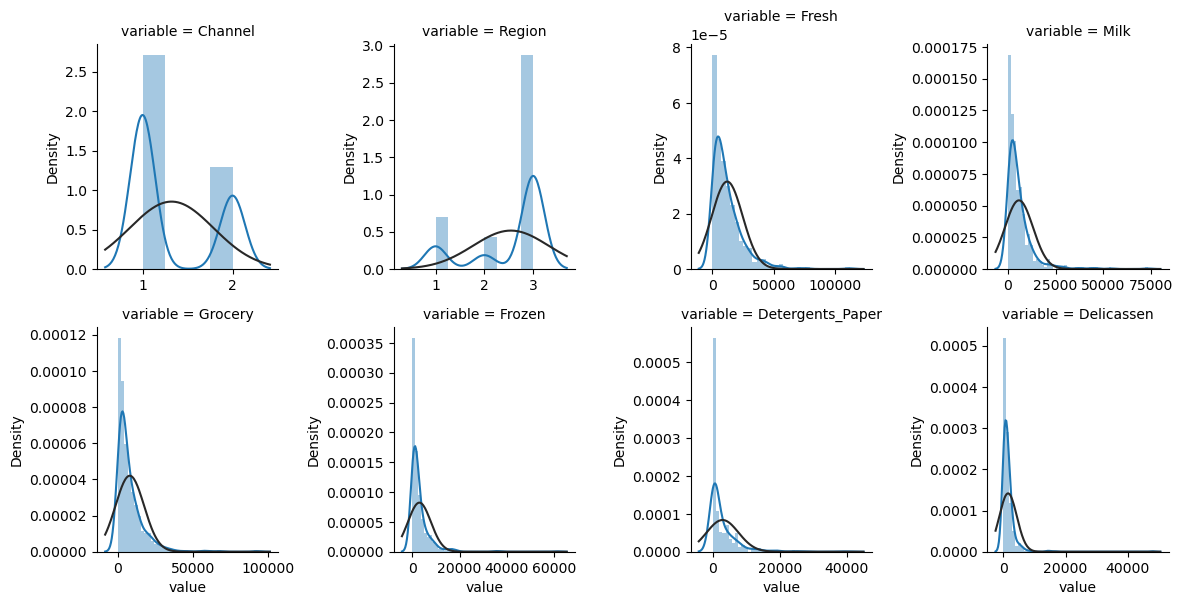

In [14]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
# Histogram to display skewness of every numeric variable
f = pd.melt(df_num, value_vars = df_num.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')

In [15]:
# Check for missing values and print the missing columns with their counts
missing_counts = data.isnull().sum()

# Filter to get columns with missing values
missing_columns = missing_counts[missing_counts > 0]

if not missing_columns.empty:
    # Sort missing columns in descending order
    sorted_missing_columns = missing_columns.sort_values(ascending=False)

    print("Columns with missing values and their counts (sorted in descending order):")
    print(sorted_missing_columns)
else:
    print("No missing values in the DataFrame.")

No missing values in the DataFrame.



Strong Correlations (|correlation| > 0.7):
Grocery - Milk: 0.73
Detergents_Paper - Grocery: 0.92


<Axes: >

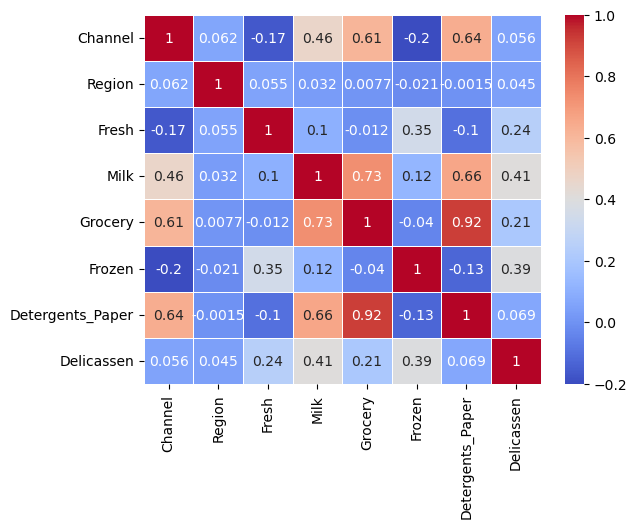

In [16]:
#checking for highly correlated columns:
correlation_matrix = data.corr()

def print_strong_correlations(corr_matrix, threshold=0.7):
    print("\nStrong Correlations (|correlation| > {}):".format(threshold))
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print("{} - {}: {:.2f}".format(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print_strong_correlations(correlation_matrix)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [17]:
import os
import sys

# Get the current notebook's absolute path and convert it to a directory path
current_notebook_path = os.path.abspath(os.getcwd())

# Append the parent directory (Project1) to the system path
project_root = os.path.dirname(current_notebook_path)
sys.path.append(project_root)

In [18]:
# Importing ElasticNetRegression and train_test_split
from Model.Gradient_Boosting import GradientBoosting
from Model.Gradient_Boosting import train_test_split
from Model.XGBoost import XGBoost as xgb
from Model.Gradient_Boosting import train_test_split

In [19]:
def test_predict():
    # Load data from CSV
    data = []
    with open("./Datset_customer.csv", "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)

    # Extract features (X) and target variable (y) from the CSV
    X = np.array([[float(row[col]) for col in row if col != 'Channel'] for row in data])
    y = np.array([float(row['Channel']) for row in data])

    # Debug: Check the shapes of X and y
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")

    # Convert target `y` to binary
    threshold = np.median(y)
    y_binary = (y > threshold).astype(int)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_seed=42)
    _, _, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.25, random_seed=42)

    # Debug: Check the shapes of split data
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

    # Create an instance of GradientBoosting
    gradient_booster = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=1)

    # Train the model
    print("Training the model...")
    gradient_booster.fit(X_train, y_train)

    # Predict on both training and test sets
    print("Predicting on training and testing sets...")
    y_train_pred = gradient_booster.predict(X_train)
    y_test_pred = gradient_booster.predict(X_test)

    # Threshold the predictions (convert to binary)
    y_train_pred_binary = (y_train_pred > np.median(y_train_pred)).astype(int)
    y_test_pred_binary = (y_test_pred > np.median(y_test_pred)).astype(int)

    # Calculate evaluation metrics
    train_mse = gradient_booster.mean_squared_error(y_train, y_train_pred)
    test_mse = gradient_booster.mean_squared_error(y_test, y_test_pred)

    train_r2 = gradient_booster.r2_score(y_train, y_train_pred)
    test_r2 = gradient_booster.r2_score(y_test, y_test_pred)

    # Calculate F1 score using the method from the class
    train_f1 = GradientBoosting.f1_score(y_train_binary, y_train_pred_binary)
    test_f1 = GradientBoosting.f1_score(y_test_binary, y_test_pred_binary)

    train_gini = GradientBoosting.gini_coefficient(y_train_binary, y_train_pred)
    test_gini = GradientBoosting.gini_coefficient(y_test_binary, y_test_pred)

    # Checking bias
    train_residuals = y_train_pred - y_train
    test_residuals = y_test_pred - y_test
    train_mean_bias = np.mean(train_residuals)
    test_mean_bias = np.mean(test_residuals)

    # Print the results
    print("\nTraining Metrics:")
    print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
    print(f"  R-Squared: {train_r2:.4f}")
    print(f"  F1 Score: {train_f1:.4f}")
    print(f"  Gini Coefficient: {train_gini:.4f}")
    print(f"  Mean Bias: {train_mean_bias:.4f}")

    print("\nTesting Metrics:")
    print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
    print(f"  R-Squared: {test_r2:.4f}")
    print(f"  F1 Score: {test_f1:.4f}")
    print(f"  Gini Coefficient: {test_gini:.4f}")
    print(f"  Mean Bias: {test_mean_bias:.4f}")
# Call the function
test_predict()


Shape of X: (440, 7)
Shape of y: (440,)
Training set size: 330, Test set size: 110
Training the model...
Iteration 0: MSE: 0.1925046550209184
Iteration 10: MSE: 0.08928634339378874
Iteration 20: MSE: 0.07128446638262076
Iteration 30: MSE: 0.06637012548376324
Iteration 40: MSE: 0.06380813836853168
Iteration 50: MSE: 0.062190568156020115
Iteration 60: MSE: 0.061008916891126024
Iteration 70: MSE: 0.06005015302886127
Iteration 80: MSE: 0.0592898850148287
Iteration 90: MSE: 0.058664392216089566
Predicting on training and testing sets...

Training Metrics:
  Mean Squared Error (MSE): 0.0582
  R-Squared: 0.7331
  F1 Score: 0.7675
  Gini Coefficient: 0.6403
  Mean Bias: 0.0000

Testing Metrics:
  Mean Squared Error (MSE): 0.0467
  R-Squared: 0.7880
  F1 Score: 0.7912
  Gini Coefficient: 0.6485
  Mean Bias: -0.0131


In [20]:
def test_predict_XG():
    # Load data from CSV
    data = []
    with open("./Datset_customer.csv", "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)

    # Extract features (X) and target variable (y) from the CSV
    X = np.array([[float(row[col]) for col in row if col != 'Channel'] for row in data])
    y = np.array([float(row['Channel']) for row in data])

    # Debug: Check the shapes of X and y
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")

    # Convert target `y` to binary
    threshold = np.median(y)
    y_binary = (y > threshold).astype(int)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_seed=42)

    # Debug: Check the shapes of split data
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

    # Create an instance of XGBoost
    xg_booster = xgb(n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1.0, gamma=0.0)

    # Train the model
    print("Training the model...")
    xg_booster.fit(X_train, y_train)

    # Predict on both training and test sets
    print("Predicting on training and testing sets...")
    y_train_pred_proba = xg_booster.predict_proba(X_train)
    y_test_pred_proba = xg_booster.predict_proba(X_test)

    # Convert probabilities to binary predictions
    y_train_pred = (y_train_pred_proba > 0.5).astype(int)
    y_test_pred = (y_test_pred_proba > 0.5).astype(int)

    # Calculate evaluation metrics
    train_mse = xg_booster.mean_squared_error(y_train, y_train_pred_proba)
    test_mse = xg_booster.mean_squared_error(y_test, y_test_pred_proba)

    train_r2 = xg_booster.r2_score(y_train, y_train_pred_proba)
    test_r2 = xg_booster.r2_score(y_test, y_test_pred_proba)

    train_f1 = xg_booster.f1_score(y_train, y_train_pred)
    test_f1 = xg_booster.f1_score(y_test, y_test_pred)

    train_gini = xg_booster.gini_impurity(y_train, y_train_pred_proba)
    test_gini = xg_booster.gini_impurity(y_test, y_test_pred_proba)

    # Print the results
    print("\nTraining Metrics:")
    print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
    print(f"  R-Squared: {train_r2:.4f}")
    print(f"  F1 Score: {train_f1:.4f}")
    print(f"  Gini Index: {train_gini:.4f}")

    print("\nTesting Metrics:")
    print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
    print(f"  R-Squared: {test_r2:.4f}")
    print(f"  F1 Score: {test_f1:.4f}")
    print(f"  Gini Index: {test_gini:.4f}")

# Call the function
test_predict_XG()

Shape of X: (440, 7)
Shape of y: (440,)
Training set size: 330, Test set size: 110
Training the model...
Iteration 0: Training MSE = 0.1271363083684796
Iteration 10: Training MSE = 1.216936913053914
Iteration 20: Training MSE = 3.526462894848376
Iteration 30: Training MSE = 6.298325117439503
Iteration 40: Training MSE = 8.91223450961791
Iteration 50: Training MSE = 10.818610408674877
Iteration 60: Training MSE = 12.326685278474486
Iteration 70: Training MSE = 13.729049519986086
Iteration 80: Training MSE = 14.800232655623304
Iteration 90: Training MSE = 15.731209377519058
Predicting on training and testing sets...

Training Metrics:
  Mean Squared Error (MSE): 0.0179
  R-Squared: 0.9177
  F1 Score: 0.9717
  Gini Index: 0.4361

Testing Metrics:
  Mean Squared Error (MSE): 0.0432
  R-Squared: 0.8037
  F1 Score: 0.9315
  Gini Index: 0.4403
